# Data

In [9]:
# loading necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('thl_recoded.csv')
data.head()

,kannabis,k9,k12,alcohol_use,k21a,k21b,risk_of_use,risk_of_try,cannabis_access,other_access,...,k70b_3.0,k70b_4.0,k70c_2.0,k70c_3.0,k70c_4.0,k70d_2.0,k70d_3.0,k70d_4.0,k70e_3.0,k70e_4.0
0,0.0,4.0,4.0,7.0,2.0,1.0,20.0,13.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,3.0,3.0,6.0,3.0,3.0,22.0,14.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,5.0,5.0,7.0,3.0,2.0,21.0,13.0,2.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,3.0,5.0,6.0,2.0,1.0,22.0,11.0,3.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,3.0,5.0,6.0,2.0,3.0,21.0,12.0,1.0,3.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [5]:
 # Kannabis use
data['kannabis'].value_counts(normalize= True)

0.0    0.934577
1.0    0.065423
Name: kannabis, dtype: float64

# Combination of Over- and Under-sampling/ Hybrid Methods

There are two ready-to-use classes imbalanced-learn implements for combining over- and under-sampling methods are SMOTETomek and SMOTEENN. 

In [11]:
# resample by adding samples to minority class using SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values

resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_oversamp, Y_over_samp = resample.fit_resample(X, y)



#split data train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversamp,
                                                    Y_over_samp,
                                                    test_size=0.3,
                                                    random_state = 10)



print(f"Class counts after resampling {Counter( Y_over_samp)}")

Class counts after resampling Counter({0.0: 3257, 1.0: 3257})


# Select the minumum features


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV

rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=18)
model = GradientBoostingClassifier()




In [15]:
pipeline = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9810914786967418

In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('Feature Selection',
                 RFE(estimator=GradientBoostingClassifier(),
                     n_features_to_select=18)),
                ('Model', GradientBoostingClassifier())])

Accuracy: 0.976
Precision: 0.976
Recall: 0.976
F1 Score: 0.976
Cohen Kappa Score: 0.9519
Matthews Corrcoef: 0.9519
roc_auc_score: 0.9759497645211931
		Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       968
         1.0       0.98      0.97      0.98       987

    accuracy                           0.98      1955
   macro avg       0.98      0.98      0.98      1955
weighted avg       0.98      0.98      0.98      1955

Confusion Matrix:
 [[948  27]
 [ 20 960]]


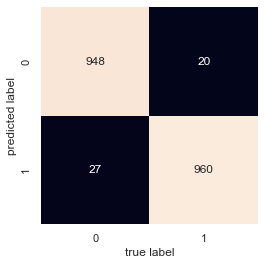

In [17]:
y_pred = pipeline.predict(X_test)
from sklearn import metrics
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred),4))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred,average='weighted'),4))
print('Recall:', np.round(metrics.recall_score(y_test, y_pred,
                                               average='weighted'),4))
print('F1 Score:', np.round(metrics.f1_score(y_test, y_pred,
                                               average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test, y_pred),4))
print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(y_test, y_pred),4)) 

from sklearn.metrics import roc_auc_score
print("roc_auc_score:", roc_auc_score(y_test, y_pred, average=None))

print('\t\tClassification Report:\n', metrics.classification_report(y_pred,y_test))


from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))


#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
from io import BytesIO #neded for plot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


plt.xlabel('true label')
plt.ylabel('predicted label');

plt.savefig("Confusion.jpg")
# Save SVG in a fake file object.
f = BytesIO()
plt.savefig(f, format="svg")

In [45]:
# Extract features 
# there should be an efficient way!
rfe.support_rfe_df = pd.DataFrame(rfe.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)

dt_columns = rfe.support_rfe_df[rfe.support_rfe_df ['Rank']==1].reset_index()
dt_columns = list(np.array(dt_columns['index']))
dt_columns

['k9',
 'k23d_2.0',
 'violence_treat_1',
 'k23a_2.0',
 'non_medicide_1',
 'k6_2.0',
 'k70e_3.0',
 'drug_offer_1',
 'k70b_3.0',
 'k4_3.0',
 'k70b_4.0',
 'cannabis_access',
 'risk_of_try',
 'risk_of_use',
 'k21a',
 'k12',
 'doping_access',
 'drug_user_friend_1']

In [46]:
new_X = data[dt_columns]
new_X.head().T

,0,1,2,3,4
k9,4.0,3.0,5.0,3.0,3.0
k23d_2.0,0.0,1.0,1.0,0.0,0.0
violence_treat_1,1.0,1.0,0.0,1.0,0.0
k23a_2.0,0.0,1.0,1.0,0.0,0.0
non_medicide_1,0.0,0.0,0.0,0.0,0.0
k6_2.0,1.0,1.0,1.0,1.0,1.0
k70e_3.0,0.0,0.0,0.0,0.0,0.0
drug_offer_1,1.0,1.0,1.0,1.0,1.0
k70b_3.0,1.0,0.0,0.0,0.0,1.0
k4_3.0,0.0,0.0,0.0,0.0,0.0


# Model Testing

In [40]:
# Use selected feature fot the model 
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_oversamp, Y_over_samp = resample.fit_resample(new_X, y)



#split data train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversamp,
                                                    Y_over_samp,
                                                    test_size=0.2,
                                                    random_state = 10)



print(f"Class counts after resampling {Counter( Y_over_samp)}")

Class counts after resampling Counter({0.0: 3257, 1.0: 3257})


In [41]:
print('Dimension of train data: ', X_train.shape)
print('Dimension of test data: ', X_test.shape)

Dimension of train data:  (5211, 18)
Dimension of test data:  (1303, 18)


### Scaling
Robust Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [ ]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
X_train_std = robust.fit_transform(X_train)
X_test_std = robust.transform(X_test)